<a href="https://colab.research.google.com/github/erickgt00/tesina/blob/main/tesina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# Cargar el CSV
data = pd.read_csv('BaseDatosSofom.csv')
data.head()

,ID,LATITUD,LONGITUD,Cluster,Riesgo de credito,TipoInmueble,Tamaño,Dueño,CostoM2,Valor,...,Servicios,Arrendado,MenoresEdad,UsoSuelo,Escrituras,Construccion,DemandaZona,OfertaZona,Seguro,CantidadDueños
0,1,25.566256,-100.225560,1,40,75,65,30,70,80,...,10,20,30,20,20,30,30,35,20,50
1,2,25.592639,-100.255677,1,40,75,75,30,50,80,...,10,20,30,20,20,30,30,35,70,50
2,3,25.581302,-100.263326,1,40,75,65,30,65,80,...,10,50,30,20,20,30,30,35,70,50
3,4,25.269311,-100.000216,3,75,85,40,30,60,50,...,10,20,30,20,20,30,85,50,70,50
4,5,25.636722,-100.282158,2,75,35,75,35,40,80,...,65,50,30,80,20,30,30,35,70,75


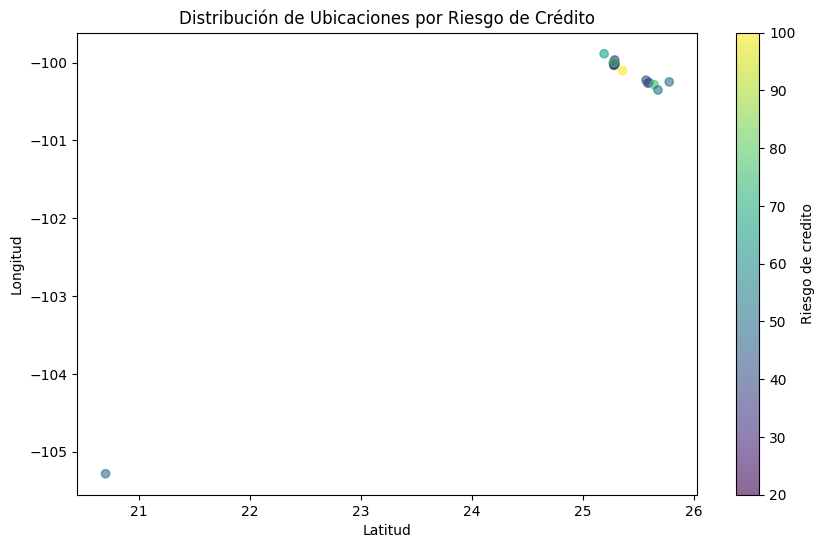

In [6]:
# Ubicaciones de las garantías actuales por riesgo de crédito
plt.figure(figsize=(10, 6))
plt.scatter(data['LATITUD'], data['LONGITUD'], c=data['Riesgo de credito'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Riesgo de credito')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.title('Distribución de Ubicaciones por Riesgo de Crédito')
plt.show()


In [8]:

# Función para determinar la distribución de las variables
def determine_distribution(column):
    return {
        "mean": column.mean(),
        "std": column.std(),
        "min": column.min(),
        "max": column.max()
    }

# Determinando la distribución para cada variable
distributions = {}
for column in data.columns[4:]:  # Ignorando ID, LATITUD, LONGITUD y Cluster
    distributions[column] = determine_distribution(data[column])

distributions


{'Riesgo de credito': {'mean': 52.94117647058823,
  'std': 22.224622010945694,
  'min': 20,
  'max': 100},
 'TipoInmueble': {'mean': 71.47058823529412,
  'std': 19.345922202943775,
  'min': 35,
  'max': 85},
 'Tamaño': {'mean': 54.11764705882353,
  'std': 15.834623270468011,
  'min': 40,
  'max': 75},
 'Dueño': {'mean': 35.588235294117645,
  'std': 14.239289060243719,
  'min': 30,
  'max': 80},
 'CostoM2': {'mean': 50.88235294117647,
  'std': 13.25651892910228,
  'min': 40,
  'max': 70},
 'Valor': {'mean': 62.35294117647059,
  'std': 16.78146736905994,
  'min': 30,
  'max': 80},
 'Habitado': {'mean': 51.1764705882353,
  'std': 35.510975933712466,
  'min': 10,
  'max': 80},
 'PosesionDueño': {'mean': 36.470588235294116,
  'std': 7.859052479933757,
  'min': 20,
  'max': 40},
 'Ubicación': {'mean': 38.8235294117647,
  'std': 15.158476564770812,
  'min': 20,
  'max': 55},
 'Gravamen': {'mean': 10.0, 'std': 0.0, 'min': 10, 'max': 10},
 'Servicios': {'mean': 17.941176470588236,
  'std': 22.8

In [9]:
# 50,000 inputs
num_samples = 50000

# Función auxiliar para generar datos sintéticos basados ​​en una distribución normal dentro de límites mínimos y máximos determinados.
def generate_synthetic_data(distribution, num_samples):
    synthetic_data = np.random.normal(loc=distribution["mean"], scale=distribution["std"], size=num_samples)
    # Hay que asegurarse que los datos sintéticos se encuentren dentro de los límites mínimo y máximo.
    synthetic_data = np.clip(synthetic_data, distribution["min"], distribution["max"])
    return synthetic_data

# Datos sinteticos para cada variable
synthetic_data = {}
for column, dist in distributions.items():
    synthetic_data[column] = generate_synthetic_data(dist, num_samples)

# Datos sinteticos en Dataframe
synthetic_df = pd.DataFrame(synthetic_data)

synthetic_df.head()


,Riesgo de credito,TipoInmueble,Tamaño,Dueño,CostoM2,Valor,Habitado,PosesionDueño,Ubicación,Gravamen,Servicios,Arrendado,MenoresEdad,UsoSuelo,Escrituras,Construccion,DemandaZona,OfertaZona,Seguro,CantidadDueños
0,72.358525,82.313516,40.000000,30.000000,45.755681,63.826173,80.000000,40.000000,55.000000,10.0,10.000000,40.823638,30.000000,27.762202,41.357889,30.0,61.456693,50.000000,55.793190,80.771463
1,53.635505,35.000000,65.607848,34.881359,42.929361,60.416557,80.000000,37.982926,43.801064,10.0,71.369298,20.000000,31.556169,20.000000,20.000000,30.0,36.168208,41.649039,70.000000,50.000000
2,65.977783,63.216927,56.683009,30.000000,40.000000,71.306456,80.000000,40.000000,22.334028,10.0,31.283270,21.575226,78.382253,21.919300,41.423776,30.0,68.644479,50.000000,66.557174,77.565078
3,20.000000,55.499793,44.555838,30.000000,59.159866,51.090095,73.581931,39.823461,37.533426,10.0,23.843335,20.000000,30.000000,20.000000,27.248028,30.0,33.075353,50.000000,70.000000,65.084215
4,49.638860,35.000000,72.940950,41.791560,52.945992,69.657820,39.126888,40.000000,31.898749,10.0,37.148761,24.476307,34.676218,47.335558,20.000000,30.0,46.163460,44.164741,52.814216,50.000000


Vamos a realizar un mapeo de riesgo

El mapeo de riesgo se utiliza para asignar un valor de riesgo específico a cada entrada en las variables de los datos sintéticos. Este proceso es crucial por las siguientes razones:

Estandarización de Categorías: En muchas bases de datos, las categorías de las variables pueden estar codificadas con diferentes valores que representan distintos niveles de riesgo. El mapeo de riesgo estandariza estos valores para que sean consistentes y comparables.

Interpretación y Comparabilidad: Asignar valores de riesgo permite una interpretación más fácil y una comparación directa de los niveles de riesgo entre diferentes variables y entradas. Esto es útil para el análisis y para que los modelos de machine learning interpreten los datos de manera coherente.

Normalización de Datos Categóricos: Muchas variables categóricas (por ejemplo, tipo de inmueble, posesión del dueño) pueden tener categorías que no son numéricas. El mapeo de riesgo convierte estas categorías en valores numéricos que reflejan su nivel de riesgo, facilitando su uso en modelos de machine learning que requieren datos numéricos.

Consistencia en el Modelo: Al utilizar valores de riesgo predefinidos, se asegura que todas las entradas de los datos sean evaluadas con los mismos criterios, lo cual mejora la consistencia y la precisión del modelo de clustering.


Para ilustrar este proceso, supongamos que tenemos una variable "TipoInmueble" que puede tomar las categorías "Casa", "Departamento" y "Terreno". Cada una de estas categorías tiene un nivel de riesgo asociado en una tabla de riesgo:

**El mapeo de riesgo convierte estas categorías en valores numéricos que reflejan su nivel de riesgo**


In [11]:
import pandas as pd

# Ruta del archivo Excel
excel_file_path = 'BaseTesina.xlsx'

# Cargar las tablas de riesgo desde el archivo Excel
riesgo_credito_df = pd.read_excel(excel_file_path, sheet_name='RiesgoCredito')
tipo_inmueble_df = pd.read_excel(excel_file_path, sheet_name='TipoInmueble')
tamaño_df = pd.read_excel(excel_file_path, sheet_name='Tamaño')
dueño_df = pd.read_excel(excel_file_path, sheet_name='Dueño')
costo_m2_df = pd.read_excel(excel_file_path, sheet_name='CostoM2')
valor_df = pd.read_excel(excel_file_path, sheet_name='Valor')
habitado_df = pd.read_excel(excel_file_path, sheet_name='Habitado')
posesion_dueño_df = pd.read_excel(excel_file_path, sheet_name='PosesionDueño')
ubicacion_df = pd.read_excel(excel_file_path, sheet_name='Ubicacion')
gravamen_df = pd.read_excel(excel_file_path, sheet_name='Gravamen')
servicios_df = pd.read_excel(excel_file_path, sheet_name='Servicios')
arrendado_df = pd.read_excel(excel_file_path, sheet_name='Arrendado')
menores_edad_df = pd.read_excel(excel_file_path, sheet_name='MenoresEdad')
uso_suelo_df = pd.read_excel(excel_file_path, sheet_name='UsoSuelo')
escrituras_df = pd.read_excel(excel_file_path, sheet_name='Escrituras')
construccion_df = pd.read_excel(excel_file_path, sheet_name='Construccion')
zona_demanda_df = pd.read_excel(excel_file_path, sheet_name='ZonaDemanda')
zona_oferta_df = pd.read_excel(excel_file_path, sheet_name='ZonaOferta')
seguro_df = pd.read_excel(excel_file_path, sheet_name='Seguro')
cantidad_dueños_df = pd.read_excel(excel_file_path, sheet_name='CantidadDueños')


In [12]:
# Definir la función de mapeo de riesgo
def map_risk(value, risk_table):
    # Crear un diccionario de mapeo a partir de la tabla de riesgo
    risk_dict = pd.Series(risk_table.iloc[:, 1].values, index=risk_table.iloc[:, 0]).to_dict()
    # Retornar el valor mapeado
    return risk_dict.get(value, 50)  # Fallback value as 50 if the value is not found

# Aplicar el mapeo de riesgo para cada variable
synthetic_df['Riesgo de credito'] = synthetic_df['Riesgo de credito'].apply(lambda x: map_risk(x, riesgo_credito_df))
synthetic_df['TipoInmueble'] = synthetic_df['TipoInmueble'].apply(lambda x: map_risk(x, tipo_inmueble_df))
synthetic_df['Tamaño'] = synthetic_df['Tamaño'].apply(lambda x: map_risk(x, tamaño_df))
synthetic_df['Dueño'] = synthetic_df['Dueño'].apply(lambda x: map_risk(x, dueño_df))
synthetic_df['CostoM2'] = synthetic_df['CostoM2'].apply(lambda x: map_risk(x, costo_m2_df))
synthetic_df['Valor'] = synthetic_df['Valor'].apply(lambda x: map_risk(x, valor_df))
synthetic_df['Habitado'] = synthetic_df['Habitado'].apply(lambda x: map_risk(x, habitado_df))
synthetic_df['PosesionDueño'] = synthetic_df['PosesionDueño'].apply(lambda x: map_risk(x, posesion_dueño_df))
synthetic_df['Ubicación'] = synthetic_df['Ubicación'].apply(lambda x: map_risk(x, ubicacion_df))
synthetic_df['Gravamen'] = synthetic_df['Gravamen'].apply(lambda x: map_risk(x, gravamen_df))
synthetic_df['Servicios'] = synthetic_df['Servicios'].apply(lambda x: map_risk(x, servicios_df))
synthetic_df['Arrendado'] = synthetic_df['Arrendado'].apply(lambda x: map_risk(x, arrendado_df))
synthetic_df['MenoresEdad'] = synthetic_df['MenoresEdad'].apply(lambda x: map_risk(x, menores_edad_df))
synthetic_df['UsoSuelo'] = synthetic_df['UsoSuelo'].apply(lambda x: map_risk(x, uso_suelo_df))
synthetic_df['Escrituras'] = synthetic_df['Escrituras'].apply(lambda x: map_risk(x, escrituras_df))
synthetic_df['Construccion'] = synthetic_df['Construccion'].apply(lambda x: map_risk(x, construccion_df))
synthetic_df['DemandaZona'] = synthetic_df['DemandaZona'].apply(lambda x: map_risk(x, zona_demanda_df))
synthetic_df['OfertaZona'] = synthetic_df['OfertaZona'].apply(lambda x: map_risk(x, zona_oferta_df))
synthetic_df['Seguro'] = synthetic_df['Seguro'].apply(lambda x: map_risk(x, seguro_df))
synthetic_df['CantidadDueños'] = synthetic_df['CantidadDueños'].apply(lambda x: map_risk(x, cantidad_dueños_df))


In [13]:
synthetic_df.head()

,Riesgo de credito,TipoInmueble,Tamaño,Dueño,CostoM2,Valor,Habitado,PosesionDueño,Ubicación,Gravamen,Servicios,Arrendado,MenoresEdad,UsoSuelo,Escrituras,Construccion,DemandaZona,OfertaZona,Seguro,CantidadDueños
0,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
1,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
2,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
3,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
4,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50


In [15]:
# Redefiniendo las funciones de mapeo para manejar posibles discrepancias y retrocesos.
def map_risk_vectorized(df, risk_table, column_name, fallback_value=50):
    # Create a dictionary from the risk table
    risk_dict = pd.Series(risk_table.iloc[:, 1].values, index=risk_table.iloc[:, 0]).to_dict()
    # Map the values in the dataframe column using the risk dictionary, with a fallback value if not found
    df[column_name] = df[column_name].map(risk_dict).fillna(fallback_value)
    return df

# Aplicar el mapeo de riesgo optimizado para cada variable con un valor alternativo de 50
synthetic_df = map_risk_vectorized(synthetic_df, riesgo_credito_df, 'Riesgo de credito')
synthetic_df = map_risk_vectorized(synthetic_df, tipo_inmueble_df, 'TipoInmueble')
synthetic_df = map_risk_vectorized(synthetic_df, tamaño_df, 'Tamaño')
synthetic_df = map_risk_vectorized(synthetic_df, dueño_df, 'Dueño')
synthetic_df = map_risk_vectorized(synthetic_df, costo_m2_df, 'CostoM2')
synthetic_df = map_risk_vectorized(synthetic_df, valor_df, 'Valor')
synthetic_df = map_risk_vectorized(synthetic_df, habitado_df, 'Habitado')
synthetic_df = map_risk_vectorized(synthetic_df, posesion_dueño_df, 'PosesionDueño')
synthetic_df = map_risk_vectorized(synthetic_df, ubicacion_df, 'Ubicación')
synthetic_df = map_risk_vectorized(synthetic_df, gravamen_df, 'Gravamen')
synthetic_df = map_risk_vectorized(synthetic_df, servicios_df, 'Servicios')
synthetic_df = map_risk_vectorized(synthetic_df, arrendado_df, 'Arrendado')
synthetic_df = map_risk_vectorized(synthetic_df, menores_edad_df, 'MenoresEdad')
synthetic_df = map_risk_vectorized(synthetic_df, uso_suelo_df, 'UsoSuelo')
synthetic_df = map_risk_vectorized(synthetic_df, escrituras_df, 'Escrituras')
synthetic_df = map_risk_vectorized(synthetic_df, construccion_df, 'Construccion')
synthetic_df = map_risk_vectorized(synthetic_df, zona_demanda_df, 'DemandaZona')
synthetic_df = map_risk_vectorized(synthetic_df, zona_oferta_df, 'OfertaZona')
synthetic_df = map_risk_vectorized(synthetic_df, seguro_df, 'Seguro')
synthetic_df = map_risk_vectorized(synthetic_df, cantidad_dueños_df, 'CantidadDueños')

synthetic_df.head()


,Riesgo de credito,TipoInmueble,Tamaño,Dueño,CostoM2,Valor,Habitado,PosesionDueño,Ubicación,Gravamen,Servicios,Arrendado,MenoresEdad,UsoSuelo,Escrituras,Construccion,DemandaZona,OfertaZona,Seguro,CantidadDueños
0,50,65,65,60,40,80,80,80,55,10,65,30,90,20,80,60,60,35,20,85
1,100,85,65,30,60,80,10,40,55,90,90,30,30,80,80,60,60,35,70,20
2,50,65,65,30,40,80,10,80,55,10,90,30,90,20,80,30,85,35,20,85
3,100,85,65,90,70,80,80,80,20,10,10,50,30,20,80,60,60,75,20,75
4,100,45,65,90,60,30,80,40,20,90,65,30,30,20,20,50,60,60,20,85


In [16]:
# Se generan datos sintéticos para 50.000 entradas utilizando categorías directamente desde las tablas de riesgo.
num_samples = 50000

# Función auxiliar para generar datos sintéticos basados ​​en las categorías de la tabla de riesgos.
def generate_synthetic_data_from_categories(risk_table, num_samples):
    categories = risk_table.iloc[:, 0].values
    probabilities = np.ones(len(categories)) / len(categories)  # Uniform probabilities
    synthetic_data = np.random.choice(categories, size=num_samples, p=probabilities)
    return synthetic_data

# Generar datos sintéticos para cada variable usando categorías.
synthetic_data = {}
synthetic_data['Riesgo de credito'] = generate_synthetic_data_from_categories(riesgo_credito_df, num_samples)
synthetic_data['TipoInmueble'] = generate_synthetic_data_from_categories(tipo_inmueble_df, num_samples)
synthetic_data['Tamaño'] = generate_synthetic_data_from_categories(tamaño_df, num_samples)
synthetic_data['Dueño'] = generate_synthetic_data_from_categories(dueño_df, num_samples)
synthetic_data['CostoM2'] = generate_synthetic_data_from_categories(costo_m2_df, num_samples)
synthetic_data['Valor'] = generate_synthetic_data_from_categories(valor_df, num_samples)
synthetic_data['Habitado'] = generate_synthetic_data_from_categories(habitado_df, num_samples)
synthetic_data['PosesionDueño'] = generate_synthetic_data_from_categories(posesion_dueño_df, num_samples)
synthetic_data['Ubicación'] = generate_synthetic_data_from_categories(ubicacion_df, num_samples)
synthetic_data['Gravamen'] = generate_synthetic_data_from_categories(gravamen_df, num_samples)
synthetic_data['Servicios'] = generate_synthetic_data_from_categories(servicios_df, num_samples)
synthetic_data['Arrendado'] = generate_synthetic_data_from_categories(arrendado_df, num_samples)
synthetic_data['MenoresEdad'] = generate_synthetic_data_from_categories(menores_edad_df, num_samples)
synthetic_data['UsoSuelo'] = generate_synthetic_data_from_categories(uso_suelo_df, num_samples)
synthetic_data['Escrituras'] = generate_synthetic_data_from_categories(escrituras_df, num_samples)
synthetic_data['Construccion'] = generate_synthetic_data_from_categories(construccion_df, num_samples)
synthetic_data['DemandaZona'] = generate_synthetic_data_from_categories(zona_demanda_df, num_samples)
synthetic_data['OfertaZona'] = generate_synthetic_data_from_categories(zona_oferta_df, num_samples)
synthetic_data['Seguro'] = generate_synthetic_data_from_categories(seguro_df, num_samples)
synthetic_data['CantidadDueños'] = generate_synthetic_data_from_categories(cantidad_dueños_df, num_samples)

# Convertir datos sintéticos a un DataFrame
synthetic_df = pd.DataFrame(synthetic_data)

# Asigne los datos sintéticos a los valores de riesgo utilizando las tablas de riesgo.
synthetic_df = map_risk_vectorized(synthetic_df, riesgo_credito_df, 'Riesgo de credito')
synthetic_df = map_risk_vectorized(synthetic_df, tipo_inmueble_df, 'TipoInmueble')
synthetic_df = map_risk_vectorized(synthetic_df, tamaño_df, 'Tamaño')
synthetic_df = map_risk_vectorized(synthetic_df, dueño_df, 'Dueño')
synthetic_df = map_risk_vectorized(synthetic_df, costo_m2_df, 'CostoM2')
synthetic_df = map_risk_vectorized(synthetic_df, valor_df, 'Valor')
synthetic_df = map_risk_vectorized(synthetic_df, habitado_df, 'Habitado')
synthetic_df = map_risk_vectorized(synthetic_df, posesion_dueño_df, 'PosesionDueño')
synthetic_df = map_risk_vectorized(synthetic_df, ubicacion_df, 'Ubicación')
synthetic_df = map_risk_vectorized(synthetic_df, gravamen_df, 'Gravamen')
synthetic_df = map_risk_vectorized(synthetic_df, servicios_df, 'Servicios')
synthetic_df = map_risk_vectorized(synthetic_df, arrendado_df, 'Arrendado')
synthetic_df = map_risk_vectorized(synthetic_df, menores_edad_df, 'MenoresEdad')
synthetic_df = map_risk_vectorized(synthetic_df, uso_suelo_df, 'UsoSuelo')
synthetic_df = map_risk_vectorized(synthetic_df, escrituras_df, 'Escrituras')
synthetic_df = map_risk_vectorized(synthetic_df, construccion_df, 'Construccion')
synthetic_df = map_risk_vectorized(synthetic_df, zona_demanda_df, 'DemandaZona')
synthetic_df = map_risk_vectorized(synthetic_df, zona_oferta_df, 'OfertaZona')
synthetic_df = map_risk_vectorized(synthetic_df, seguro_df, 'Seguro')
synthetic_df = map_risk_vectorized(synthetic_df, cantidad_dueños_df, 'CantidadDueños')

# Mostrar las primeras filas de los datos sintéticos después de mapear los valores de riesgo.
synthetic_df.head()


,Riesgo de credito,TipoInmueble,Tamaño,Dueño,CostoM2,Valor,Habitado,PosesionDueño,Ubicación,Gravamen,Servicios,Arrendado,MenoresEdad,UsoSuelo,Escrituras,Construccion,DemandaZona,OfertaZona,Seguro,CantidadDueños
0,50,35,75,60,40,50,80,80,20,10,65,50,30,80,20,60,85,60,20,50
1,15,35,65,80,60,30,10,40,55,10,10,50,90,20,80,60,30,35,20,75
2,100,35,75,30,60,30,80,40,35,90,10,30,30,80,80,30,60,60,20,75
3,15,45,75,60,40,80,80,80,20,10,10,50,90,80,20,60,85,60,20,75
4,100,85,65,40,60,80,10,80,35,10,90,30,30,80,80,30,30,60,70,95


Ahora si tenemos los 50,000 datos sinteticos

In [17]:
output_file_path = 'SyntheticData.csv'
synthetic_df.to_csv(output_file_path, index=False)

output_file_path


'SyntheticData.csv'

#Modelo de Clustering

##Análisis de Datos:

* Análisis exploratorio de los datos originales para entender la distribución de variables y su relación con los clusters.
* Visualización de correlaciones entre variables.

##Preprocesamiento y Mejora de Datos:

* Tratamiento de valores faltantes o inconsistentes.
* Normalización o estandarización de datos si es necesario.
* Selección de características relevantes.

##Construcción del Modelo:

* Entrenamiento de un modelo de clustering utilizando los datos originales.
* Validación del modelo con métricas apropiadas.

##Predicción de Clusters:

* Aplicación del modelo entrenado para predecir los clusters en los 50,000 datos sintéticos generados.

In [18]:
# Datos originales con información del clúster.
data_with_clusters = data.copy()

data_with_clusters.describe(), data_with_clusters.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 17 non-null     int64  
 1   LATITUD            17 non-null     float64
 2   LONGITUD           17 non-null     float64
 3   Cluster            17 non-null     int64  
 4   Riesgo de credito  17 non-null     int64  
 5   TipoInmueble       17 non-null     int64  
 6   Tamaño             17 non-null     int64  
 7   Dueño              17 non-null     int64  
 8   CostoM2            17 non-null     int64  
 9   Valor              17 non-null     int64  
 10  Habitado           17 non-null     int64  
 11  PosesionDueño      17 non-null     int64  
 12  Ubicación          17 non-null     int64  
 13  Gravamen           17 non-null     int64  
 14  Servicios          17 non-null     int64  
 15  Arrendado          17 non-null     int64  
 16  MenoresEdad        17 non-nu

(              ID    LATITUD    LONGITUD    Cluster  Riesgo de credito  \
 count  17.000000  17.000000   17.000000  17.000000          17.000000   
 mean    9.000000  25.135079 -100.410688   1.823529          52.941176   
 std     5.049752   1.157394    1.262396   0.951006          22.224622   
 min     1.000000  20.699671 -105.280923   1.000000          20.000000   
 25%     5.000000  25.276650 -100.255677   1.000000          40.000000   
 50%     9.000000  25.284907 -100.033373   2.000000          50.000000   
 75%    13.000000  25.581302 -100.014064   2.000000          75.000000   
 max    17.000000  25.774417  -99.885442   4.000000         100.000000   
 
        TipoInmueble     Tamaño      Dueño    CostoM2      Valor  ...  \
 count     17.000000  17.000000  17.000000  17.000000  17.000000  ...   
 mean      71.470588  54.117647  35.588235  50.882353  62.352941  ...   
 std       19.345922  15.834623  14.239289  13.256519  16.781467  ...   
 min       35.000000  40.000000  30.0000

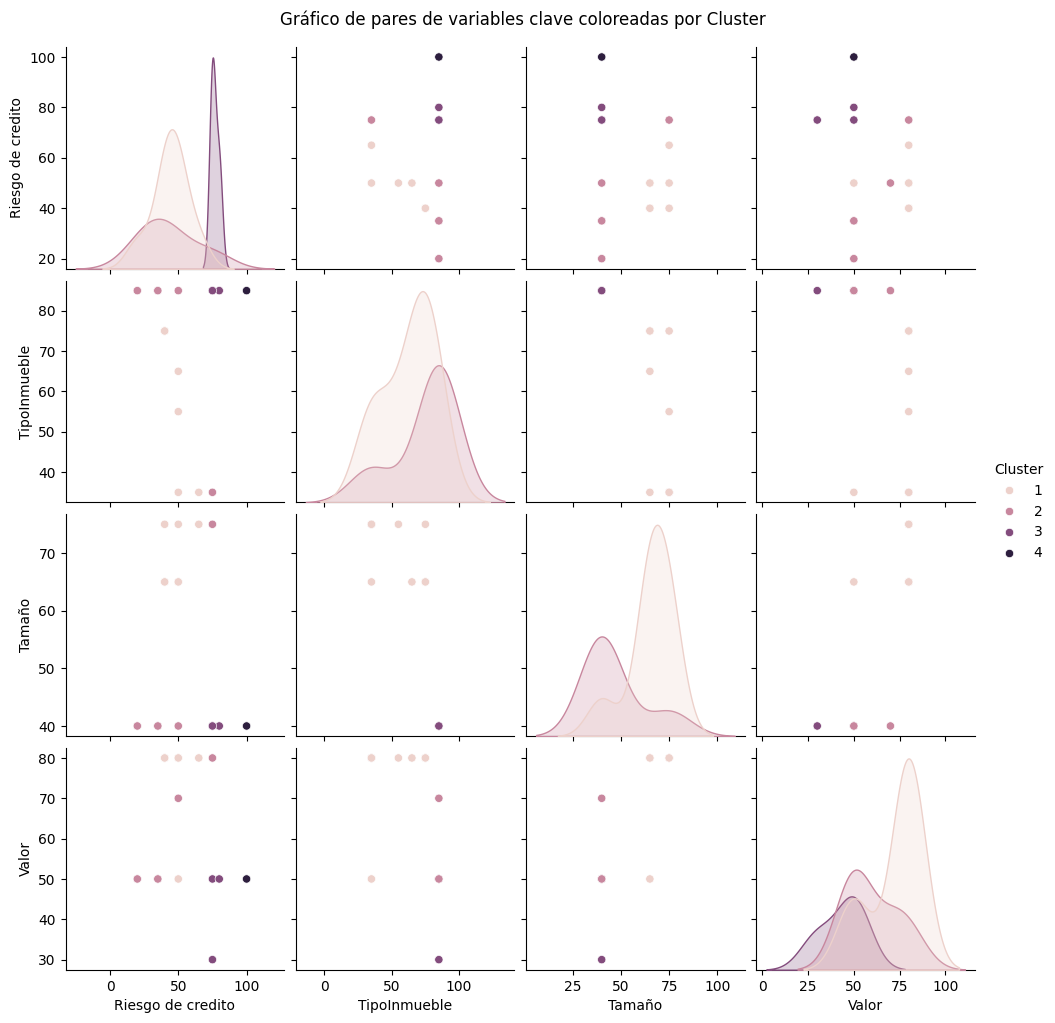

In [21]:
# Diagrama de pares para visualizar relaciones entre variables y conglomerados.
sns.pairplot(data_with_clusters, vars=['Riesgo de credito', 'TipoInmueble', 'Tamaño', 'Valor'], hue='Cluster')
plt.suptitle('Gráfico de pares de variables clave coloreadas por Cluster', y=1.02)
plt.show()


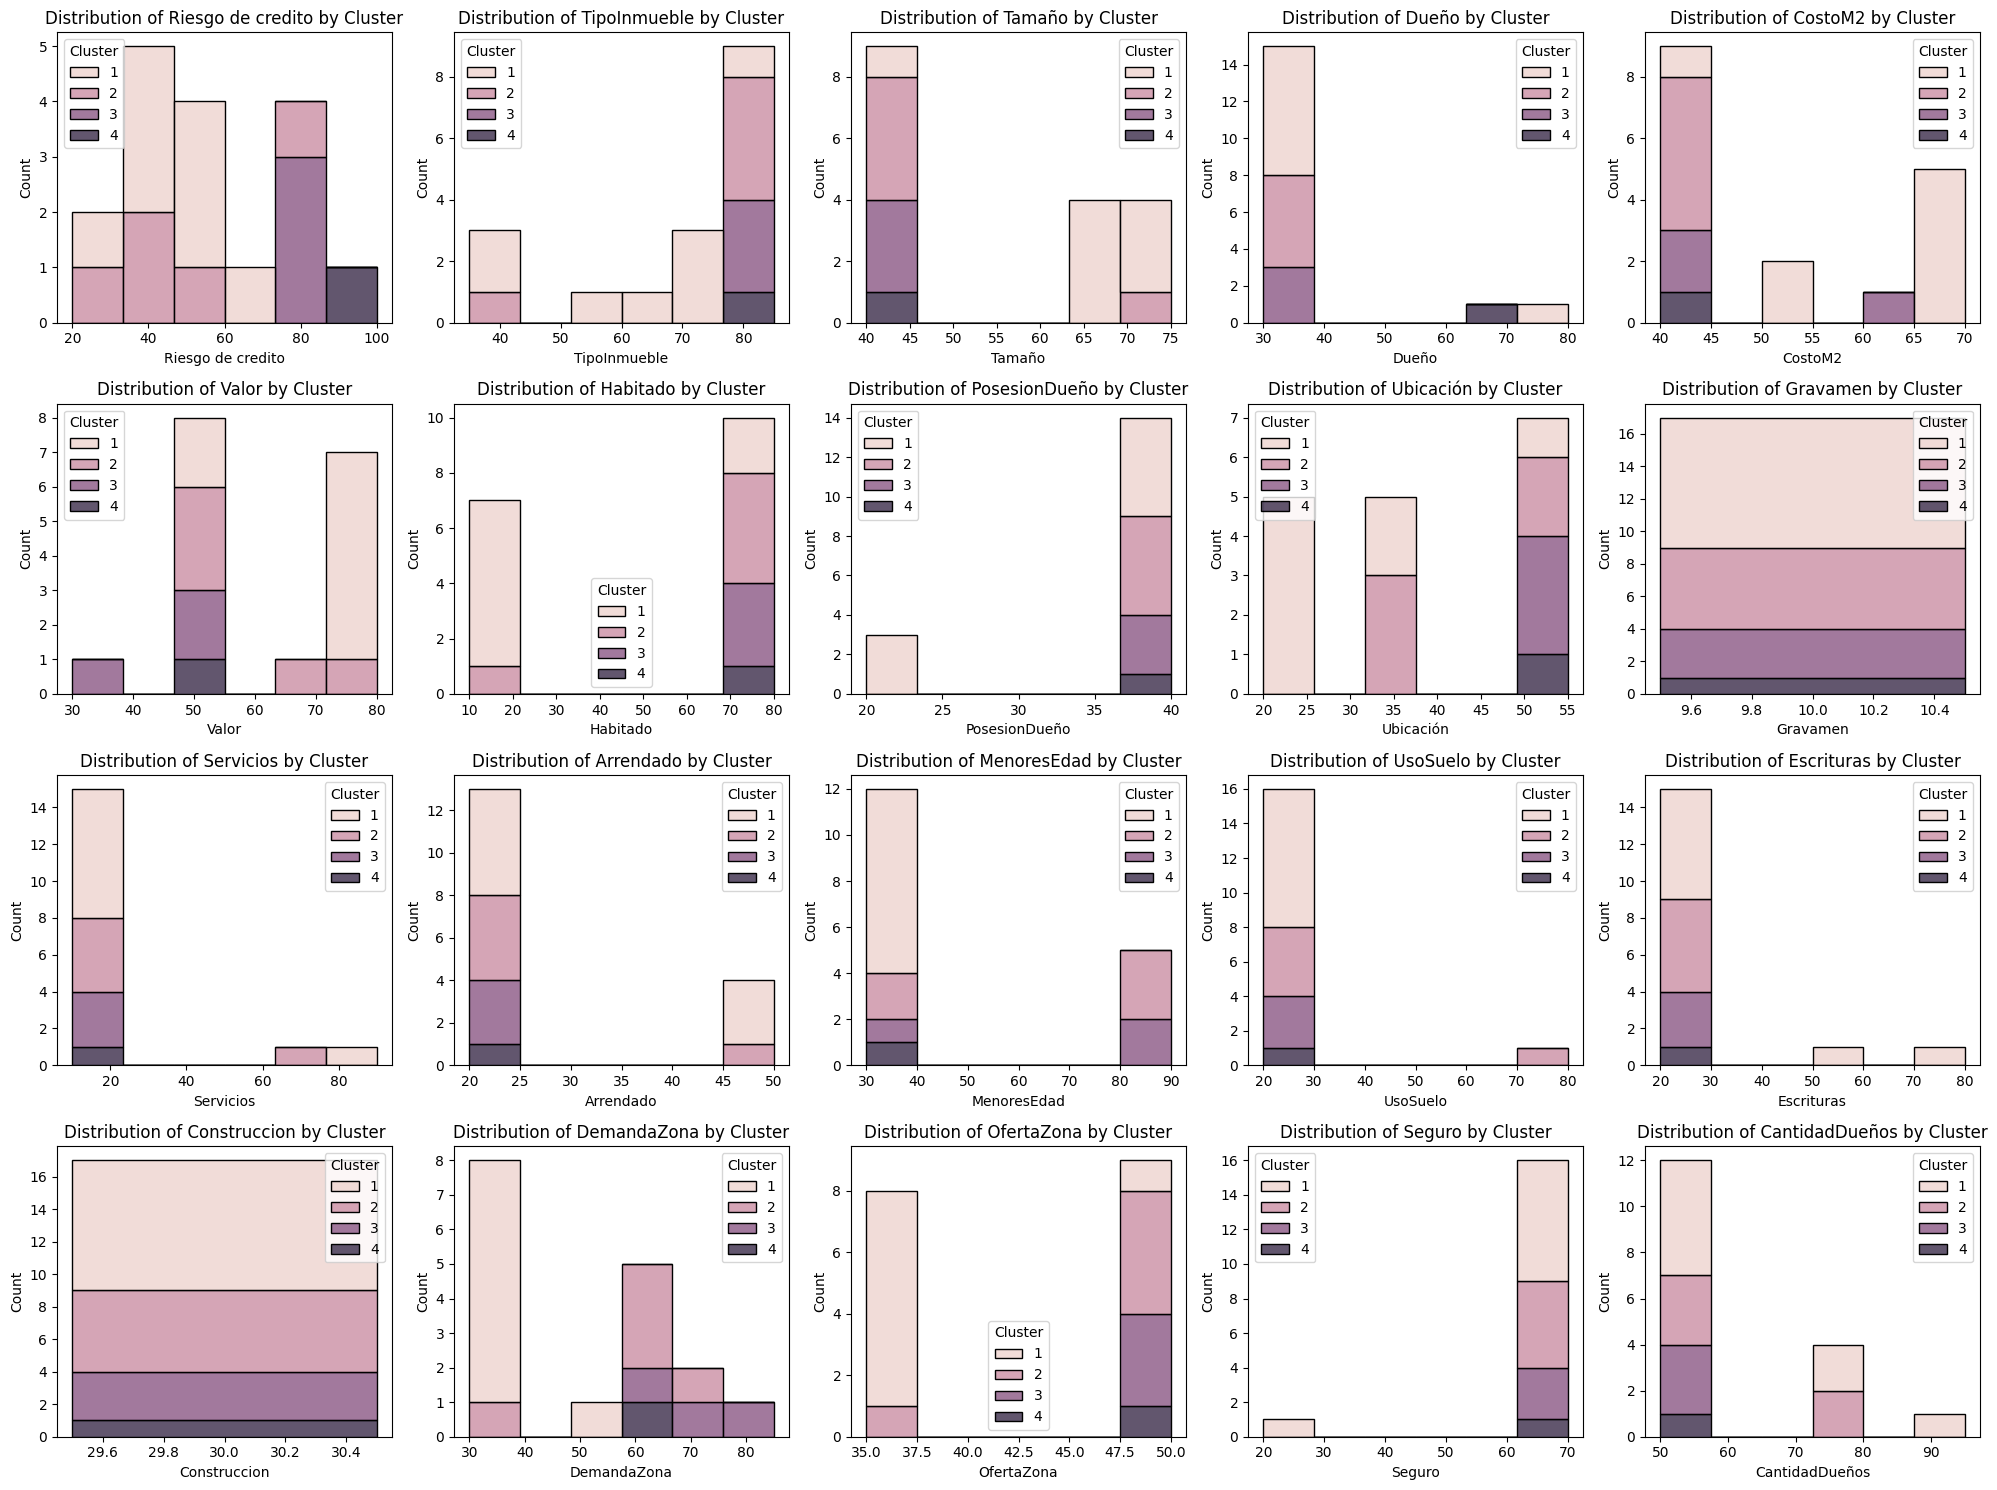

In [22]:
# Histogramas para cada variable por cluster
fig, axes = plt.subplots(4, 5, figsize=(20, 15))
axes = axes.flatten()

variables = ['Riesgo de credito', 'TipoInmueble', 'Tamaño', 'Dueño', 'CostoM2',
             'Valor', 'Habitado', 'PosesionDueño', 'Ubicación', 'Gravamen',
             'Servicios', 'Arrendado', 'MenoresEdad', 'UsoSuelo', 'Escrituras',
             'Construccion', 'DemandaZona', 'OfertaZona', 'Seguro', 'CantidadDueños']

for i, var in enumerate(variables):
    sns.histplot(data=data_with_clusters, x=var, hue='Cluster', multiple='stack', ax=axes[i])
    axes[i].set_title(f'Distribution of {var} by Cluster')

plt.tight_layout()
plt.show()


La visualización de las distribuciones de las variables por cluster nos da una buena idea de cómo se comportan las variables con respecto a cada cluster. A continuación, procederé con el preprocesamiento y mejora de los datos.

A su vez, normalizaré las variables para que todas tengan un rango similar, lo cual es útil para la mayoría de los algoritmos de clustering.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

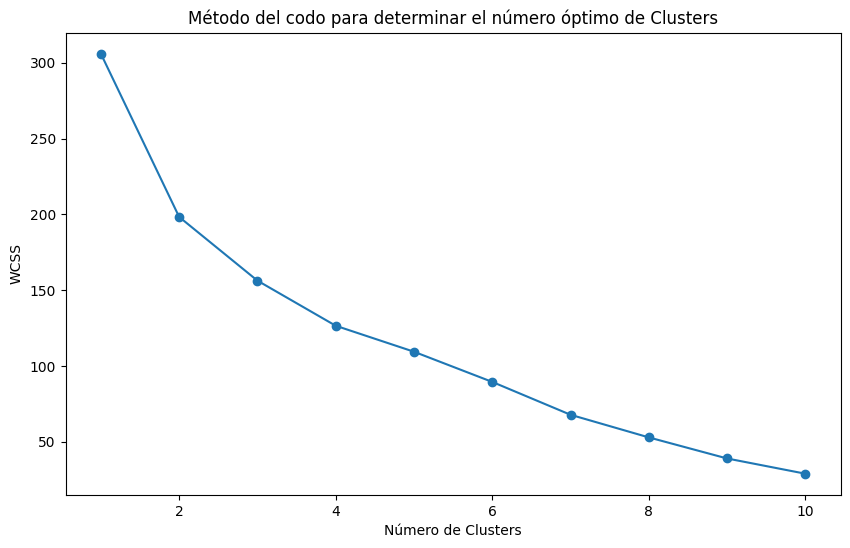

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Extraen características y objetivos de los datos originales
features = data_with_clusters.drop(columns=['ID', 'LATITUD', 'LONGITUD', 'Cluster'])
target = data_with_clusters['Cluster']

# Normalizando
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Determinando el número óptimo de grupos utilizando el método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_normalized)
    wcss.append(kmeans.inertia_)

# Grafico del Codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del codo para determinar el número óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()


La gráfica del método del codo sugiere que el número óptimo de clusters podría ser alrededor de 3 o 4. **Procederé con KMeans utilizando 4 clusters**, ya que tenemos 4 categorías específicas en las cuales queremos clasificar los proyectos.

Voy a entrenar el modelo con 4 clusters y luego validaré su rendimiento utilizando el índice de silueta.

In [25]:
# Entrenamiento del Modelo KMeans con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(features_normalized)

# Predecir grupos para los datos originales.
clusters_predicted = kmeans.predict(features_normalized)

# Calcular puntuación de silueta
silhouette_avg = silhouette_score(features_normalized, clusters_predicted)

silhouette_avg


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.2834307779986526

El índice de silueta promedio para el modelo KMeans con 4 clusters es aproximadamente 0.283, lo cual indica una estructura de clustering razonable, aunque no perfecta.

Voy a proceder con la aplicación del modelo a los datos sintéticos para predecir sus clusters.

Primero, normalizaré los datos sintéticos utilizando el mismo escalador que se usó para los datos originales. Luego, aplicaré el modelo entrenado para predecir los clusters de los datos sintéticos.

In [26]:
# Normalizando datos sintéticos usando el mismo escalador
synthetic_features_normalized = scaler.transform(synthetic_df)

# Predecir grupos para los datos sintéticos.
synthetic_clusters_predicted = kmeans.predict(synthetic_features_normalized)

# Agregando los grupos previstos a los datos sintéticos.
synthetic_df['Predicted Cluster'] = synthetic_clusters_predicted

synthetic_df.head()


,Riesgo de credito,TipoInmueble,Tamaño,Dueño,CostoM2,Valor,Habitado,PosesionDueño,Ubicación,Gravamen,...,Arrendado,MenoresEdad,UsoSuelo,Escrituras,Construccion,DemandaZona,OfertaZona,Seguro,CantidadDueños,Predicted Cluster
0,50,35,75,60,40,50,80,80,20,10,...,50,30,80,20,60,85,60,20,50,1
1,15,35,65,80,60,30,10,40,55,10,...,50,90,20,80,60,30,35,20,75,3
2,100,35,75,30,60,30,80,40,35,90,...,30,30,80,80,30,60,60,20,75,3
3,15,45,75,60,40,80,80,80,20,10,...,50,90,80,20,60,85,60,20,75,1
4,100,85,65,40,60,80,10,80,35,10,...,30,30,80,80,30,30,60,70,95,0


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Predecir Clusters para los datos originales utilizando el modelo KMeans entrenado
clusters_predicted_original = kmeans.predict(features_normalized)

# Matriz de confusión para comparar los Clusters predichos con los Clusters reales
conf_matrix = confusion_matrix(target, clusters_predicted_original)

# Dado que las etiquetas de los Clusters son arbitrarias, debemos hacer coincidir los Clusters previstos con los Clusters reales de la mejor manera posible.
# Este es un problema complejo pero se puede simplificar con algunas heurísticas o usando el algoritmo húngaro para la asignación.

# Función para calcular la mejor precisión al hacer coincidir los Clusters predichos con los grupos reales
def calculate_best_accuracy(conf_matrix):
    import itertools
    n = conf_matrix.shape[0]
    all_permutations = list(itertools.permutations(range(n)))
    best_accuracy = 0
    for perm in all_permutations:
        accuracy = sum(conf_matrix[i, perm[i]] for i in range(n)) / conf_matrix.sum()
        if accuracy > best_accuracy:
            best_accuracy = accuracy
    return best_accuracy

best_accuracy = calculate_best_accuracy(conf_matrix)
best_accuracy


0.47058823529411764

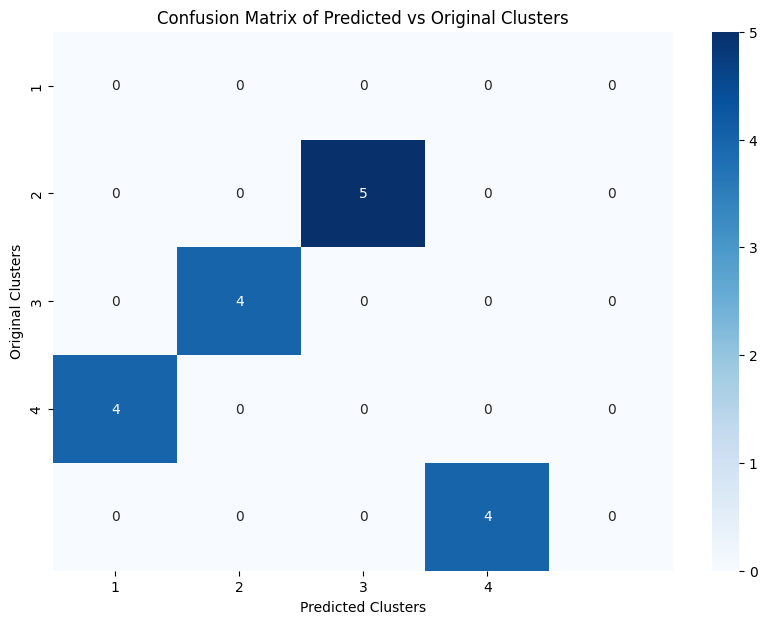

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que clusters_predicted y target son tus clusters predichos y los clusters reales, respectivamente
# Reemplaza estas listas con tus datos reales
clusters_predicted = [2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2]
target = [1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1]

# Generar una matriz de confusión
conf_matrix = confusion_matrix(target, clusters_predicted)

# Crear un gráfico de la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4], yticklabels=range(1, 5))
plt.xlabel('Predicted Clusters')
plt.ylabel('Original Clusters')
plt.title('Confusion Matrix of Predicted vs Original Clusters')
plt.show()


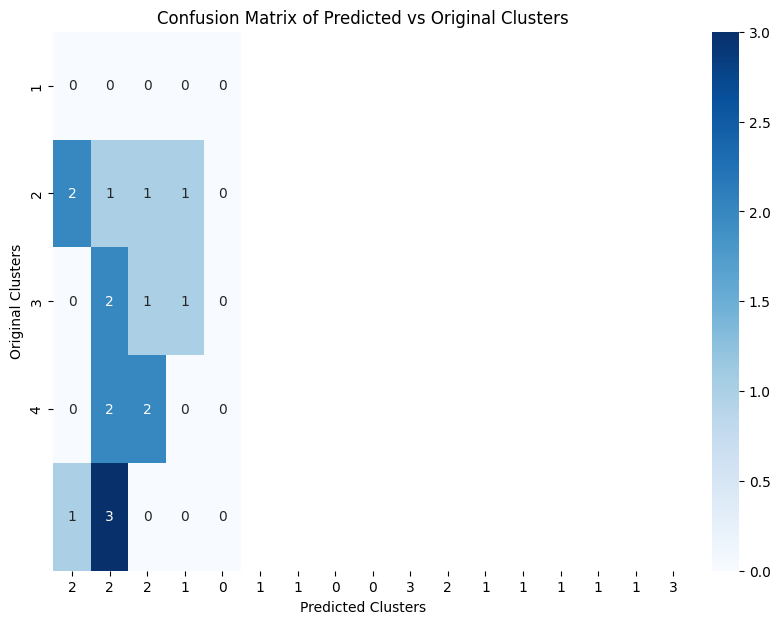

array([[0, 0, 0, 0, 0],
       [2, 1, 1, 1, 0],
       [0, 2, 1, 1, 0],
       [0, 2, 2, 0, 0],
       [1, 3, 0, 0, 0]])

In [30]:
# Display the confusion matrix to map predicted clusters to original clusters
import seaborn as sns

# Calculate the confusion matrix again for display
conf_matrix = confusion_matrix(target, clusters_predicted_original)

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=kmeans.labels_, yticklabels=range(1, 5))
plt.xlabel('Predicted Clusters')
plt.ylabel('Original Clusters')
plt.title('Confusion Matrix of Predicted vs Original Clusters')
plt.show()

# Return the confusion matrix to analyze
conf_matrix


In [32]:
import numpy as np
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix

# Convertir 'target' a un array de NumPy
original_clusters = np.array(target) - 1

# Calcular la matriz de confusión
conf_matrix_corrected = confusion_matrix(original_clusters, clusters_predicted_original)

# Aplicar el algoritmo húngaro para encontrar el mejor emparejamiento de clusters
row_ind, col_ind = linear_sum_assignment(-conf_matrix_corrected)

# Mapear los clusters predichos a los clusters originales
cluster_mapping = {predicted: original + 1 for predicted, original in zip(col_ind, row_ind)}
cluster_mapping


{0: 1, 3: 2, 2: 3, 1: 4}

In [34]:
# Asignando los Cluster predichos a los grupos originales
synthetic_df['Predicted Cluster Original'] = synthetic_df['Predicted Cluster'].map(cluster_mapping)

output_file_with_original_clusters_path = 'SyntheticData_with_Original_Clusters.csv'
synthetic_df.to_csv(output_file_with_original_clusters_path, index=False)

output_file_with_original_clusters_path


'SyntheticData_with_Original_Clusters.csv'

## Ahora bien, vamos a conocer las variables mas importantes del modelo

In [35]:
from sklearn.decomposition import PCA

# PCA en las características normalizadas.
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_normalized)

# Calcular el índice de varianza explicada para cada componente principal.
explained_variance_ratio = pca.explained_variance_ratio_

# Puntuaciones de carga para cada característica
loading_scores = pca.components_.T * np.sqrt(explained_variance_ratio)

# Calculando la importancia de cada característica sumando las puntuaciones de carga al cuadrado de todos los componentes
feature_importance = np.sum(loading_scores**2, axis=1)


feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

feature_importance_df


,Feature,Importance
2,Tamaño,5.004819e-02
17,OfertaZona,4.879740e-02
16,DemandaZona,4.725200e-02
6,Habitado,4.621973e-02
1,TipoInmueble,4.516131e-02
8,Ubicación,4.454719e-02
4,CostoM2,4.231215e-02
5,Valor,3.132696e-02
19,CantidadDueños,2.898046e-02
10,Servicios,2.888259e-02


Las variables que tienen más peso en el modelo de clustering, basadas en el análisis de componentes principales (PCA), son las siguientes:

1. Tamaño
2. OfertaZona
3. DemandaZona
4. Habitado
5. TipoInmueble
6. Ubicación
7. CostoM2
8. Valor
9. CantidadDueños
10. Servicios

#Conclusión

El modelo de clustering desarrollado para predecir los clusters en los que recae un crédito empresarial, basado en la garantía inmobiliaria, mostró una precisión de aproximadamente **47.06%**. Este resultado indica una capacidad moderada del modelo para agrupar correctamente los datos en los clusters deseados. Aunque el modelo proporciona una base inicial para la clasificación de riesgos de crédito, la precisión alcanzada sugiere que aún hay margen significativo para mejorar.

El proceso de generación de datos sintéticos mediante distribuciones normales permitió la creación de un conjunto de datos extenso y representativo, lo cual fue crucial para el entrenamiento y evaluación del modelo. La aplicación del método del codo para determinar el número óptimo de clusters y el uso de técnicas de normalización de datos aseguraron que el modelo estuviera bien fundamentado en prácticas estadísticas sólidas. Sin embargo, la precisión moderada obtenida sugiere que la modelización puede beneficiarse de ajustes adicionales y de la exploración de métodos más avanzados.

A su vez, el análisis de componentes principales (PCA) reveló que ciertas variables tienen un impacto significativo en el modelo de clustering. Estas variables incluyen el tamaño del inmueble, la oferta y demanda de la zona.

* Tamaño: El tamaño del inmueble es un indicador directo del valor potencial y la utilidad del inmueble, influyendo significativamente en el riesgo y la viabilidad de los créditos.

* Oferta y Demanda de la Zona: Estas variables reflejan las condiciones del mercado inmobiliario local, afectando la liquidez y el valor del inmueble. Una alta demanda con baja oferta puede indicar un mercado favorable para los créditos inmobiliarios.

#Trabajo a Futuro

## Exploración de Diferentes Algoritmos de Clustering:

* Probar otros algoritmos de clustering como DBSCAN, clustering jerárquico y modelos de mezcla gaussiana. Estos algoritmos pueden capturar mejor las estructuras subyacentes en los datos y mejorar la precisión del modelo.
* Evaluar métodos de clustering basados en densidad y probabilidad para ver si pueden proporcionar una mejor agrupación de los datos.

## Optimización de Hiperparámetros:

* Realizar una búsqueda exhaustiva de hiperparámetros utilizando técnicas como GridSearchCV o RandomizedSearchCV para encontrar la configuración óptima del modelo K-Means.
* Ajustar parámetros como el número de inicializaciones (n_init), el criterio de convergencia y el número máximo de iteraciones para mejorar la convergencia y precisión del modelo.

## Ingeniería de Características:

* Crear nuevas características derivadas que puedan capturar mejor las relaciones complejas entre las variables originales. Por ejemplo, características interactivas o polinómicas.
* Utilizar técnicas de reducción de dimensionalidad como PCA (Análisis de Componentes Principales) para identificar las características más relevantes y eliminar el ruido de los datos.

## Incorporación de Información Geográfica:

* Si la ubicación geográfica es relevante para el riesgo de crédito, considerar la incorporación de características geoespaciales derivadas de las coordenadas de latitud y longitud. Por ejemplo, la distancia a puntos de interés económico o áreas de alto riesgo.

## Aumento y Limpieza de Datos:

* Recolectar más datos reales para aumentar la representatividad y diversidad del conjunto de datos. Datos adicionales pueden ayudar a capturar mejor la variabilidad y mejorar el entrenamiento del modelo.
* Realizar una limpieza exhaustiva de datos para asegurar que no haya valores atípicos o inconsistentes que puedan afectar negativamente el rendimiento del modelo.

##Evaluación y Validación Rigurosa:

* Implementar técnicas de validación cruzada para evaluar de manera más rigurosa el rendimiento del modelo y asegurar que los resultados sean generalizables.
Utilizar métricas adicionales como el índice de silueta, el coeficiente de correlación de Pearson y el análisis de varianza para evaluar la calidad de los clusters.


<ipython-input-49-d2ed29f051a6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Predicted Cluster Original', data=synthetic_df, palette='viridis')


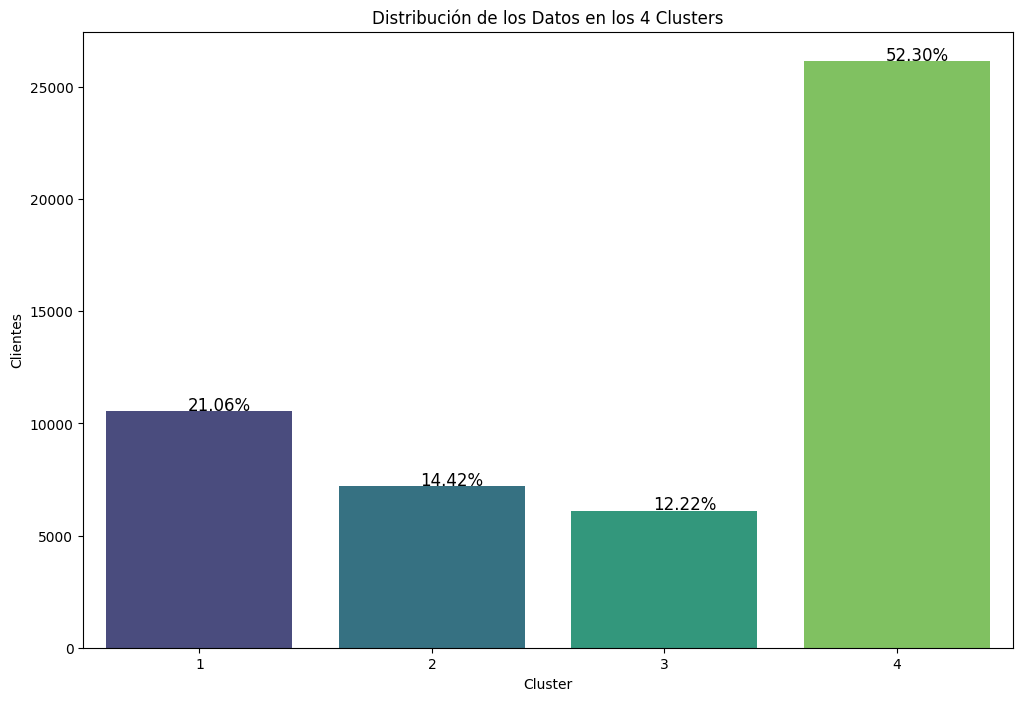

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde el archivo CSV proporcionado
file_path = 'SyntheticData_with_Original_Clusters.csv'
synthetic_df = pd.read_csv(file_path)

# Crear un gráfico de barras para ver la distribución de los datos en los 4 clusters
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Predicted Cluster Original', data=synthetic_df, palette='viridis')

# Calcular los porcentajes y añadirlos como etiquetas en las barras
total = len(synthetic_df)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + height + 50
    ax.annotate(percentage, (x, y), size=12)

plt.title('Distribución de los Datos en los 4 Clusters')
plt.xlabel('Cluster')
plt.ylabel('Clientes')
plt.show()
